In [4]:
import pandas as pd
from sklearn.utils.testing import all_estimators
from sklearn.model_selection import KFold
import warnings
from sklearn.model_selection import cross_val_score

# 붓꽃 데이터 읽어 들이기
iris_data = pd.read_csv("iris.csv", encoding="utf-8")

# 붓꽃 데이터를 레이블과 입력 데이터로 분리하기 
y = iris_data.loc[:,"Name"]
x = iris_data.loc[:,["SepalLength","SepalWidth","PetalLength","PetalWidth"]]

# classifier 알고리즘 모두 추출하기
warnings.filterwarnings('ignore')
allAlgorithms = all_estimators(type_filter="classifier")

# K-분할 크로스 밸리데이션 전용 객체 --- (*1)
kfold_cv = KFold(n_splits=5, shuffle=True)

for(name, algorithm) in allAlgorithms:
    # 각 알고리즘 객체 생성하기
    clf = algorithm()

    # score 메서드를 가진 클래스를 대상으로 하기--- (*2)
    if hasattr(clf,"score"):
        
        # 크로스 밸리데이션--- (*3)
        scores = cross_val_score(clf, x, y, cv=kfold_cv)
        print(name,"의 정답률=")
        print(scores)

ModuleNotFoundError: No module named 'sklearn.utils.testing'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# 붓꽃 데이터 읽어 들이기
iris_data = pd.read_csv("iris.csv", encoding="utf-8")

# 붓꽃 데이터를 레이블과 입력 데이터로 분리하기
y = iris_data.loc[:,"Name"]
x = iris_data.loc[:,["SepalLength","SepalWidth","PetalLength","PetalWidth"]]

# 학습 전용과 테스트 전용 분리하기 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8, shuffle = True)

# 그리드 서치에서 사용할 매개 변수 --- (*1)
parameters = [
    {"C": [1, 10, 100, 1000], "kernel":["linear"]},
    {"C": [1, 10, 100, 1000], "kernel":["rbf"], "gamma":[0.001, 0.0001]},
    {"C": [1, 10, 100, 1000], "kernel":["sigmoid"], "gamma": [0.001, 0.0001]}
]

# 그리드 서치 --- (*2)
kfold_cv = KFold(n_splits=5, shuffle=True)
clf = GridSearchCV( SVC(), parameters, cv=kfold_cv)
clf.fit(x_train, y_train)
print("최적의 매개 변수 = ", clf.best_estimator_)

# 최적의 매개 변수로 평가하기 --- (*3)
y_pred = clf.predict(x_test)
print("최종 정답률 = " , accuracy_score(y_test, y_pred))

얼굴의 좌표 = 128 83 200 200


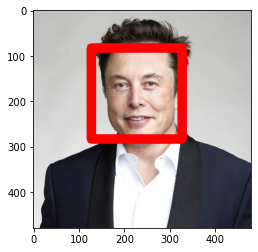

In [11]:
import matplotlib.pyplot as plt
import cv2

cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

img = cv2.imread("Elon_Musk.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))

if len(face_list) == 0:
    print("얼굴 인식 실패")
    quit()

for (x,y,w,h) in face_list:
    print("얼굴의 좌표 =", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)


cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()